# **🚀 Telecom X – Parte 2: Predicción de Cancelación (Churn)🚀**

#### Desarrollar modelos predictivos capaces de prever qué clientes tienen mayor probabilidad de cancelar sus servicios.
#### La empresa quiere anticiparse al problema de la cancelación, y te corresponde a ti construir un pipeline robusto para esta etapa inicial de modelado.


## 🎯 Objetivos del Desafío
  ✅ Preparar los datos para el modelado (tratamiento, codificación,   normalización).

  ✅ Realizar análisis de correlación y selección de variables.

  ✅ Entrenar dos o más modelos de clasificación.

  ✅ Evaluar el rendimiento de los modelos con métricas.

  ✅ Interpretar los resultados, incluyendo la importancia de las variables.
  
  ✅ Crear una conclusión estratégica señalando los principales factores que influyen en la cancelación.


# **Extracion Del Archivo Tratado**

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
url = 'https://raw.githubusercontent.com/Malcuthrad/Challenge-TelecomX-Part-2/refs/heads/main/datos_tratados.csv'

datos = pd.read_csv(url)
datos.head(5)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,one year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,month to month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,month to month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,month to month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,month to month,Yes,Mailed check,83.9,267.40


In [3]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   object 
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   object 
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   object 
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-null   object 


In [4]:
columna_convertida = ['SeniorCitizen']
datos[columna_convertida] = datos[columna_convertida].replace({'Yes' : 1, 'No': 0})
datos.sample(4)

/tmp/ipython-input-1234789816.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos[columna_convertida] = datos[columna_convertida].replace({'Yes' : 1, 'No': 0})


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
51,0089-IIQKO,No,Female,0,Yes,Yes,39,Yes,Yes,Fiber optic,...,No,No,Yes,Yes,Yes,month to month,Yes,Credit card (automatic),99.95,3767.40
1180,1734-ZMNTZ,No,Female,0,Yes,Yes,11,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,two year,No,Mailed check,25.00,300.70
1658,2408-WITXK,Yes,Female,1,No,No,10,No,No phone service,DSL,...,No,No,No,No,Yes,month to month,Yes,Electronic check,34.70,329.80
1091,1591-MQJTP,No,Male,1,Yes,No,51,Yes,Yes,Fiber optic,...,No,Yes,No,No,Yes,one year,Yes,Bank transfer (automatic),93.65,4839.15


In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   Churn             7032 non-null   object 
 2   gender            7032 non-null   object 
 3   SeniorCitizen     7032 non-null   int64  
 4   Partner           7032 non-null   object 
 5   Dependents        7032 non-null   object 
 6   tenure            7032 non-null   int64  
 7   PhoneService      7032 non-null   object 
 8   MultipleLines     7032 non-null   object 
 9   InternetService   7032 non-null   object 
 10  OnlineSecurity    7032 non-null   object 
 11  OnlineBackup      7032 non-null   object 
 12  DeviceProtection  7032 non-null   object 
 13  TechSupport       7032 non-null   object 
 14  StreamingTV       7032 non-null   object 
 15  StreamingMovies   7032 non-null   object 
 16  Contract          7032 non-null   object 


# Preparacion de datos

Remover columnas irrelevantes.

In [6]:
datos = datos.drop(columns=['customerID'])

In [7]:
colunmas_catagoricas = datos.select_dtypes(include='object').columns
print(colunmas_catagoricas)

Index(['Churn', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [8]:
# Impresion de los valores únicos de cada columna del dataframe
for col in datos.columns:
  print(f'{col}: {datos[col].unique()}')

Churn: ['No' 'Yes']
gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['Yes' 'No']
tenure: [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42]
PhoneService: ['Yes' 'No']
MultipleLines: ['No' 'Yes' 'No phone service']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['Yes' 'No' 'No internet service']
StreamingTV: ['Yes' 'No' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['one year' 'month to month' 'two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
Charges.Monthly: [65.6  59.9  73.9  ... 91.75 68.8 

In [9]:
# Se agrupan columnas con valores no y no internet service para reducir la dimensionalidad y evita multicolinealidad.

# para crear uno nuevo
df_clean = datos.copy()

# Agrupar "No internet service" como "No"
cols_to_fix = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

for col in cols_to_fix:
    df_clean[col] = df_clean[col].replace('No internet service', 'No')

# One-hot encoding (sin dummy trap)
categorical_cols = [
       'Churn', 'gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'
]

df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)


df_encoded

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Churn_Yes,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_one year,Contract_two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,9,65.60,593.30,False,False,True,True,True,False,...,False,True,True,False,True,False,True,False,False,True
1,0,9,59.90,542.40,False,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True
2,0,4,73.90,280.85,True,True,False,False,True,False,...,True,False,False,False,False,False,True,False,True,False
3,1,13,98.00,1237.85,True,True,True,False,True,False,...,True,False,True,True,False,False,True,False,True,False
4,1,3,83.90,267.40,True,False,True,False,True,False,...,False,True,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,13,55.15,742.90,False,False,False,False,True,False,...,False,True,False,False,True,False,False,False,False,True
7028,0,22,85.10,1873.70,True,True,True,False,True,False,...,False,False,False,True,False,False,True,False,True,False
7029,0,2,50.30,92.75,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
7030,0,67,67.85,4627.65,False,True,True,True,True,False,...,True,True,False,True,False,True,False,False,False,True


In [10]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   tenure                                 7032 non-null   int64  
 2   Charges.Monthly                        7032 non-null   float64
 3   Charges.Total                          7032 non-null   float64
 4   Churn_Yes                              7032 non-null   bool   
 5   gender_Male                            7032 non-null   bool   
 6   Partner_Yes                            7032 non-null   bool   
 7   Dependents_Yes                         7032 non-null   bool   
 8   PhoneService_Yes                       7032 non-null   bool   
 9   MultipleLines_No phone service         7032 non-null   bool   
 10  MultipleLines_Yes                      7032 non-null   bool   
 11  Inte

Normalizar datos

In [11]:
from sklearn.preprocessing import MinMaxScaler

# Seleccionando solo columnas numéricas (excepto la variable target, si ya está separada)
columnas_numericas = datos.select_dtypes(include=['int64', 'float64']).columns

# Inicializando el scaler
scaler = MinMaxScaler()

# Aplicando la normalización
datos[columnas_numericas] = scaler.fit_transform(datos[columnas_numericas])

# Mostrando los datos normalizados
datos.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,No,Female,0.0,Yes,Yes,0.112676,Yes,No,DSL,No,Yes,No,Yes,Yes,No,one year,Yes,Mailed check,0.471144,0.066294
1,No,Male,0.0,No,No,0.112676,Yes,Yes,DSL,No,No,No,No,No,Yes,month to month,No,Mailed check,0.414428,0.060420
2,Yes,Male,0.0,No,No,0.042254,Yes,No,Fiber optic,No,No,Yes,No,No,No,month to month,Yes,Electronic check,0.553731,0.030239
3,Yes,Male,1.0,Yes,No,0.169014,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,month to month,Yes,Electronic check,0.793532,0.140670
4,Yes,Female,1.0,Yes,No,0.028169,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,month to month,Yes,Mailed check,0.653234,0.028687


Correlación entre variable

In [12]:
corr = df_encoded.corr()

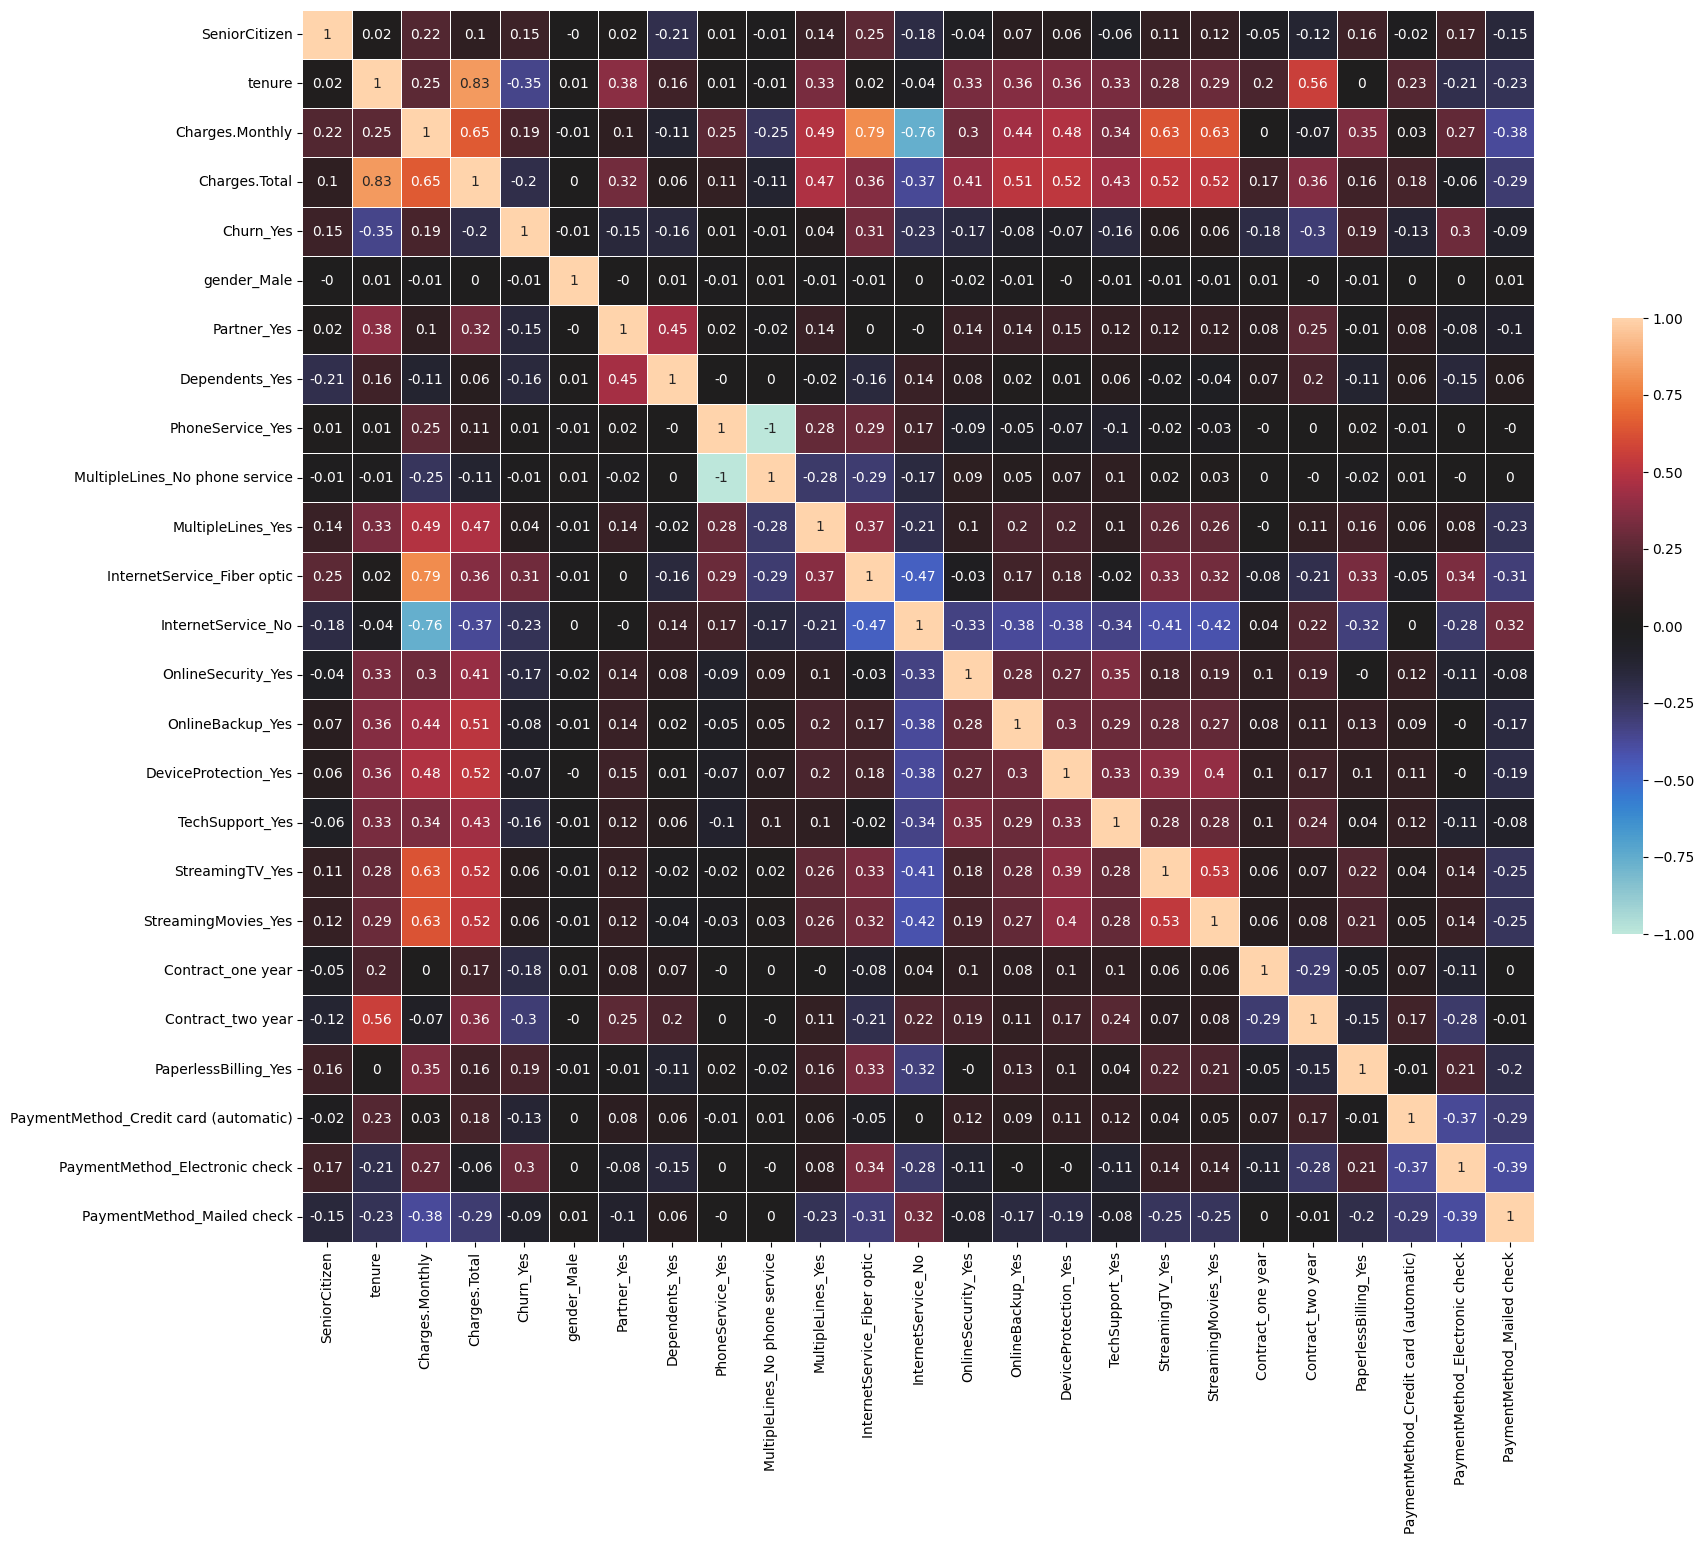

In [13]:
fig, ax = plt.subplots(figsize=(20,16))
ax = sns.heatmap(np.round(corr, 2), vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})
plt.show()

Analisis de correlación utilizando variable Churn_Yes.

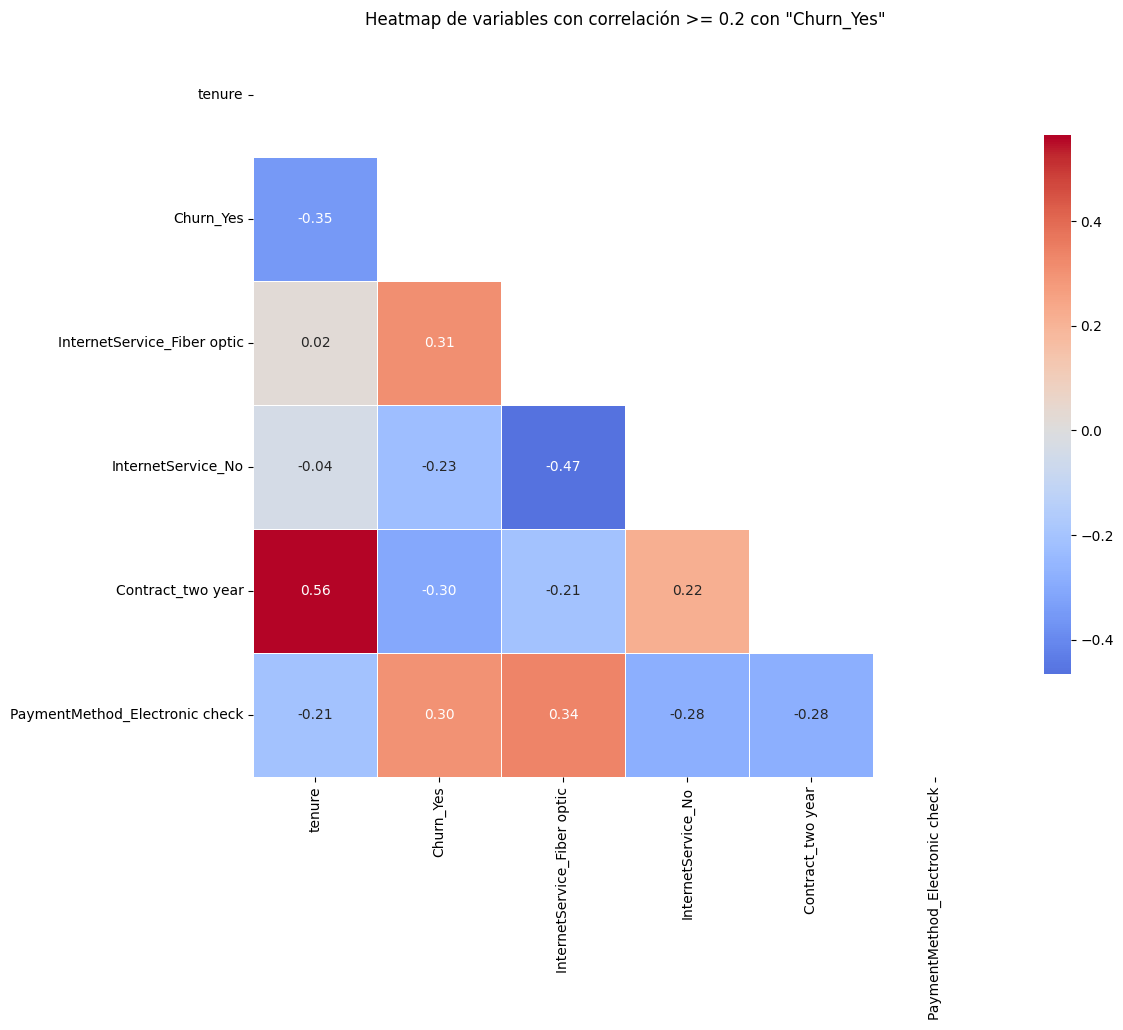

In [14]:
# Definimos la variable objetivo
target_var = 'Churn_Yes'

# Definimos umbral mínimo de correlación absoluta para selección
umbral = 0.2

# Filtramos variables que tengan correlación absoluta >= umbral con la variable objetivo
# Esto crea una lista con las variables relevantes
variables_relevantes = corr.index[abs(corr[target_var]) >= umbral].tolist()

# Aseguramos que la variable objetivo esté en la lista (si no está, se añade)
if target_var not in variables_relevantes:
    variables_relevantes.append(target_var)

# Creamos matriz de correlación solo con las variables seleccionadas
corr_filtrada = corr.loc[variables_relevantes, variables_relevantes]

# Generamos una máscara para ocultar el triángulo superior de la matriz (incluida la diagonal)
mascara = np.triu(np.ones_like(corr_filtrada, dtype=bool))

# Graficamos el heatmap con la máscara aplicada para mejorar su visualización
plt.figure(figsize=(12,10))
sns.heatmap(
    corr_filtrada,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7},
    mask=mascara
)
plt.title(f'Heatmap de variables con correlación >= {umbral} con "{target_var}"')
plt.show()

Analisis

🔍 **Correlación con `Churn_Yes` (variable objetivo)**

| Variable                                 | Correlación con Churn\_Yes | Interpretación                                                                                                              |
| ---------------------------------------- | -------------------------- | ---------------------------------------------------------------------------------------------------------------------------- |
| `internet.InternetService_Fiber optic`   | **+0.31**                  | Clientes con fibra óptica tienen **mayor probabilidad de churn**. Puede estar relacionado al costo o a la competitividad.    |
| `account.PaymentMethod_Electronic check` | **+0.30**                  | Pagos por cheque electrónico están asociados a más churn — quizás por perfil de cliente menos fidelizado.                    |
| `account.Contract_Two year`              | **-0.30**                  | Contratos de 2 años reducen el churn (clientes más comprometidos o con beneficios)                                           |
| `customer.tenure`                        | **-0.35**                  | Cuanto mayor el tiempo como cliente, menor la probabilidad de churn — esperado                                               |
| `internet.InternetService_No`            | **-0.23**                  | Quienes **no usan internet** tienden a churnar menos — posiblemente perfiles más estables (adultos mayores, menos digitales) |

Análisis de Multicolinealidad

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm

In [16]:
# Seleccionar las variables independientes
# Aquí, no incluyas la variable objetivo (ej: Churn\_Yes) en el cálculo del VIF.
X = df_encoded.drop(columns=['Churn_Yes'])

In [17]:
# Añadir constante (intercepto)
X_const = add_constant(X)

In [18]:
# Calcular el VIF
# Convert boolean columns to integers (0 or 1)
X_const = X_const.astype(float)

# Calcular el VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Mostrar resultado
display(vif_data.sort_values(by='VIF', ascending=False))


/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
8,PhoneService_Yes,inf
9,MultipleLines_No phone service,inf
3,Charges.Monthly,866.089640
11,InternetService_Fiber optic,148.500814
12,InternetService_No,104.213701
18,StreamingMovies_Yes,24.156394
17,StreamingTV_Yes,24.080019
4,Charges.Total,10.811490
2,tenure,7.584453
10,MultipleLines_Yes,7.289761


Alertas

las variables con vif = inf son problematicas porque aun son perfectamente colieales entre si y/o con otras variables.

variable Charges.Monthly tiene VIF=813.86 que es demasiado alto y esta altamente correlacionado com Chargees.Total.

Para solucionar los problemas mantendremos sólo una variable entre InternetService_Fiber optic, InternetService_No.

In [19]:
# Copiar X original para no modificar el original
X_filtered = X_const.copy()

# Remover variable com multicolinearidade perfecta (VIF = inf)
cols_to_drop = [
    "PhoneService_Yes",               # Altamente colinear com "MultipleLines"
    "MultipleLines_No phone service"  # Redundante con ausencia de telefono
]
X_filtered.drop(columns=cols_to_drop, inplace=True)

# Remover redundancia entre dummies de la misma variable categórica
# Se uso get_dummies sin drop_first, tienes dummies redundantes para InternetService
X_filtered.drop(columns=["InternetService_No"], inplace=True)

# Asegúrese de que los datos estén en formato float para que VIF funcione
X_filtered = X_filtered.astype(float)

# Recalcular o VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_filtered.columns
vif_data["VIF"] = [variance_inflation_factor(X_filtered.values, i) for i in range(X_filtered.shape[1])]

# Mostrar resultados
display(vif_data.sort_values(by="VIF", ascending=False))

,feature,VIF
0,const,36.498367
3,Charges.Monthly,18.168780
4,Charges.Total,10.706800
2,tenure,7.548716
9,InternetService_Fiber optic,6.997820
17,Contract_two year,2.532131
14,StreamingTV_Yes,2.188547
15,StreamingMovies_Yes,2.187888
20,PaymentMethod_Electronic check,1.967305
21,PaymentMethod_Mailed check,1.847752


Segundo Análisis

Charges.Monthly y Charges.Total aun tienen multicoliealidad alta posiblemente por correlacion con Charges.Total y tenure.

Se puede eliminar una de las variables Charges.Monthly o Charges.Total y recalcular VIF

In [20]:
# === Eliminar la variable account.Charges.Total ===
X_final = X_filtered.drop(columns=["Charges.Total"])

# === Recalcular el VIF ===
vif_data_final = pd.DataFrame()
vif_data_final["feature"] = X_final.columns
vif_data_final["VIF"] = [variance_inflation_factor(X_final.values, i) for i in range(X_final.shape[1])]

# === Mostrar los resultados ordenados ===
display(vif_data_final.sort_values(by="VIF", ascending=False))

,feature,VIF
0,const,29.602764
3,Charges.Monthly,17.283226
8,InternetService_Fiber optic,6.936112
2,tenure,2.826197
16,Contract_two year,2.521228
13,StreamingTV_Yes,2.166619
14,StreamingMovies_Yes,2.163842
19,PaymentMethod_Electronic check,1.964004
20,PaymentMethod_Mailed check,1.825717
12,TechSupport_Yes,1.712098


## 🤖 Modelos Predictivos

Importacion de bibliotecas necesarias.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [22]:
# Separar features y target
X = df_encoded.drop(columns=['Churn_Yes'])
y = df_encoded['Churn_Yes']

In [23]:
# Dividir entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [24]:
# Entrenar Regresion Logistica

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
# Balancear entrenamiento con SMOTE

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

In [26]:
# Regresión Logística

# Instanciar y entrenar
lr = LogisticRegression(random_state=42)
lr.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]

# Evaluación
print("Regresión Logística")
print("Exactitud:", accuracy_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Regresión Logística
Exactitud: 0.7511848341232228
ROC AUC: 0.8454813582220259
Matriz de Confusión:
 [[1130  419]
 [ 106  455]]
              precision    recall  f1-score   support

       False       0.91      0.73      0.81      1549
        True       0.52      0.81      0.63       561

    accuracy                           0.75      2110
   macro avg       0.72      0.77      0.72      2110
weighted avg       0.81      0.75      0.76      2110



In [27]:
# Random Forest

# Instanciar y entrenar
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]

# Evaluación
print("Random Forest")
print("Exactitud:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest
Exactitud: 0.7786729857819905
ROC AUC: 0.8207457171494692
Matriz de Confusión:
 [[1309  240]
 [ 227  334]]
              precision    recall  f1-score   support

       False       0.85      0.85      0.85      1549
        True       0.58      0.60      0.59       561

    accuracy                           0.78      2110
   macro avg       0.72      0.72      0.72      2110
weighted avg       0.78      0.78      0.78      2110



Exactitud (Accuracy): ~77.9% → El modelo acierta en casi 8 de cada 10 predicciones totales.

ROC AUC: 0.821 → El modelo tiene una buena capacidad de discriminar entre clientes que se van y los que se quedan (0.5 sería aleatorio, 1.0 perfecto).


Comparando Random Forest y Regresión Logística se ve un contraste claro:

1 - Métricas generales

| Modelo              | Accuracy | ROC AUC | Mejor en...                    |
| ------------------- | -------- | ------- | ------------------------------ |
| Random Forest       | 0.779    | 0.821   | Exactitud                      |
| Regresión Logística | 0.751    | 0.845   | Separación de clases (ROC AUC) |

* Random Forest clasifica correctamente un poco más de casos totales.

* Regresión Logística discrimina mejor entre churn y no churn (ROC AUC más alto).

2 - Detección de “No Churn” (False)
  * Random Forest: Precisión y recall de 0.85 → Muy equilibrado, muy bueno detectando clientes que se quedan.
  * Regresión Logística: Precisión 0.91 (menos falsos positivos) pero recall 0.73 (pierde más clientes que realmente se quedan).

3 - Detección de “Churn” (True)
  * Random Forest: Precisión 0.58, recall 0.60 → Detecta 6 de cada 10 clientes que se irán.
  * Regresión Logística: Precisión 0.52, recall 0.81 → Detecta 8 de cada 10 clientes que se irán, aunque con más falsos positivos.

4 - Matriz de confusión
* Random Forest:
  * Falsos negativos: 227 (clientes que se fueron y el modelo no detectó).
  * Falsos positivos: 240 (clientes que se quedaron y el modelo marcó como que se irían).

* Regresión Logística:
  * Falsos negativos: 106 → Mucho menor que en Random Forest.
  * Falsos positivos: 419 → Mayor que en Random Forest.

5 - Interpretación de negocio
  * Si lo más importante es detectar la mayor cantidad posible de clientes en riesgo (maximizar recall de “True” y reducir falsos negativos), la Regresión Logística es mejor: identifica el 81% de los churners.
  * Si se quiere un equilibrio y evitar contactar a demasiados clientes que no se irán (menos falsos positivos), el Random Forest es mejor.



---



---



#**Conclusiones**

# **Hallazgos principales (evidencia)**

### 1 - Tasa de churn global
  * 1869 churners de 7032 clientes → 26.58%.

### 2 - Contract (contrato) — el efecto más claro:
  * month to month: 42.71% churn (n = 3.875 clientes).
  * one year: 11.28% churn (n = 1.472).
  * two year: 2.85% churn (n = 1.685). ⇒ Clientes mes-a-mes tienen muchísimo riesgo de fuga.

### 3 - PaymentMethod (método de pago):
  * Electronic check: 45.29% churn (n = 2.365).
  * Mailed check: 19.20% (n = 1.604).
  * Bank transfer (automatic): 16.73% (n = 1.542).
  * Credit card (automatic): 15.25% (n = 1.521).
⇒ El pago por Electronic check está fuertemente asociado al churn (casi la mitad de esos clientes churnean).

### 4 - PaperlessBilling:
  * Yes: 33.59% churn (n = 4.168).
  * No: 16.38% churn (n = 2.864).
⇒ Paperless billing se asocia a mayor churn (posible proxy de clientes más "volátiles").

### 5 - Correlaciones numéricas con churn (Pearson):
  * tenure: -0.3540 (a mayor antigüedad, menor churn — efecto fuerte).
  * Charges.Total: -0.1995 (negativa — probablemente porque clientes de larga duración acumulan más total).
  * Charges.Monthly: +0.1929 (clientes con mayor cobro mensual tienden a churnear un poco más).

### 6 - Modelos en el notebook (comparación)
  * Regresión Logística:
      - Accuracy = 0.7512
      - ROC AUC = 0.8455 (mejor discriminación global)
      - Confusion matrix (test): [[1130, 419], [106, 455]] → para la clase churn (True): precision 0.5206, recall 0.8111, f1 0.6341.
      - Interp.: detecta muchos churners (alto recall) pero con más falsos positivos.
  * Random Forest:
      - Accuracy = 0.7787
      - ROC AUC = 0.8207
      - Confusion matrix (test): [[1309,240],[227,334]] → para churn: precision 0.5819, recall 0.5954, f1 0.5885.
      - Interp.: más preciso (menos FP) y mayor accuracy, pero detecta menos churners (recall menor).
  * Conclusión práctica: si la prioridad es no dejar escapar churners (intervenir mucho), la logística (o ajustar umbrales) es preferible; si quieres menos falsas alarmas, Random Forest es mejor.


## **Interpretación (por qué puede estar ocurriendo)**

  * Los clientes mes-a-mes son los más expuestos: no hay compromiso, por eso su churn ~42%.
  * Electronic check y paperless billing probablemente agrupan a clientes con procesos automáticos/menos vínculo personal: más fricción en recuperación o menor fidelidad.
  * Tenure actúa como proxy de fidelidad: a más tiempo con la compañía, menos probabilidad de irse.
  * Monthly charges positiva: precios más altos pueden motivar cancelación si el cliente percibe poco valor.



## **Recomendaciones accionables**


### 1 - Priorizar retención sobre segmentos de alto riesgo
  * Campañas para clientes month-to-month y especialmente los que pagan por Electronic check y tienen PaperlessBilling = Yes.
  * Ej.: oferta de descuento/beneficio para pasar a 12 o 24 meses, o descuentos por cambio a pago automático (si reduce churn).

### 2 - Política de detección / intervención
  * Si el objetivo es capturar la mayoría de churners, priorizar un modelo con alto recall (p. ej. Logistic + umbral ajustado) y diseñar un flujo de acciones (contacto, oferta, soporte).
  * Si el objetivo es minimizar falsos positivos (coste por contactar), usar Random Forest o ajustar umbral para mejorar precision.

### 3 - Acciones de producto / operacional
  * Revisar proceso de Electronic check (problemas de cobro, fricción en página, notificaciones).
  * Revisar propuestas de valor para clientes mes-a-mes (bundle, fidelización, beneficios por permanencia).

### 4 - Mejoras en el modelo
  * Calibrar umbral en función del coste/beneficio de intervenir.
  * Evaluar métricas robustas (AUC, precision-recall, F1) en set desbalanceado.
  * Usar explicabilidad (SHAP/permutation importance) para priorizar features de intervención.
  * Probar ensembles, calibración y validación temporal (si hay timestamps).

### 5 - Medir impacto
  * Hacer pruebas A/B para ofertas dirigidas a segmentos (p. ej. oferta a clientes Electronic check + month-to-month) y medir reducción de churn.

